In [34]:
# importing the libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [36]:
#loading the dataset
data = pd.read_csv("social_marketing.csv")

print(data.describe())

           chatter  current_events       travel  photo_sharing  uncategorized  \
count  7882.000000     7882.000000  7882.000000    7882.000000    7882.000000   
mean      4.398757        1.526262     1.585004       2.696777       0.812992   
std       3.529126        1.268890     2.285530       2.731510       0.935853   
min       0.000000        0.000000     0.000000       0.000000       0.000000   
25%       2.000000        1.000000     0.000000       1.000000       0.000000   
50%       3.000000        1.000000     1.000000       2.000000       1.000000   
75%       6.000000        2.000000     2.000000       4.000000       1.000000   
max      26.000000        8.000000    26.000000      21.000000       9.000000   

           tv_film  sports_fandom     politics         food       family  ...  \
count  7882.000000    7882.000000  7882.000000  7882.000000  7882.000000  ...   
mean      1.070287       1.594012     1.788632     1.397488     0.863867  ...   
std       1.658783       2.

In [62]:
#Handling missing values is there are any in the datset
data.fillna(0, inplace=True)

# Fill missing values with the mean
data.fillna(data.mean(), inplace=True)

# Fill missing values with the median
data.fillna(data.median(), inplace=True)

In [64]:
#Converting non-numeric values to numeric (replacing with 0)
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)


In [66]:
#For clustering, selecting only numeric columns

numeric_columns = data.iloc[:, 1:] 

# Removing the first column which is User_id

In [68]:
# Normalizing the numeric data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_columns)

In [70]:
# K-means clustering using defining the market segments 
num_clusters = 6  # You can choose the number of clusters based on the elbow method or other techniques
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Segment'] = kmeans.fit_predict(normalized_data)


In [77]:
# Analyzing the data for each individual segment
segments_data = data.groupby('Segment').mean().T 

# Transposing the DataFrame

print(segments_data)

Segment                  0         1         2          3         4         5
Unnamed: 0        0.000000  0.000000  0.000000   0.000000  0.000000  0.000000
chatter           4.055249  4.399103  4.161162   4.299781  7.864979  5.172999
current_events    1.421215  1.677130  1.665786   1.538293  1.658228  1.713824
travel            1.084199  5.713004  1.340819   1.564551  1.464135  1.364592
photo_sharing     2.166630  2.515695  2.636724   2.822757  2.894515  4.686338
uncategorized     0.693260  0.748879  0.738441   0.925602  1.434599  1.170574
tv_film           0.953591  1.203288  1.066050   1.778993  1.000000  1.179466
sports_fandom     0.957569  2.046338  5.943197   1.352298  1.236287  1.173808
politics          1.008840  9.083707  1.174373   1.328228  1.438819  1.308812
food              0.786298  1.458894  4.595773   1.284464  1.105485  1.740501
family            0.565525  0.920777  2.515192   1.078775  0.738397  0.858529
home_and_garden   0.419890  0.599402  0.636724   0.612691  0.911

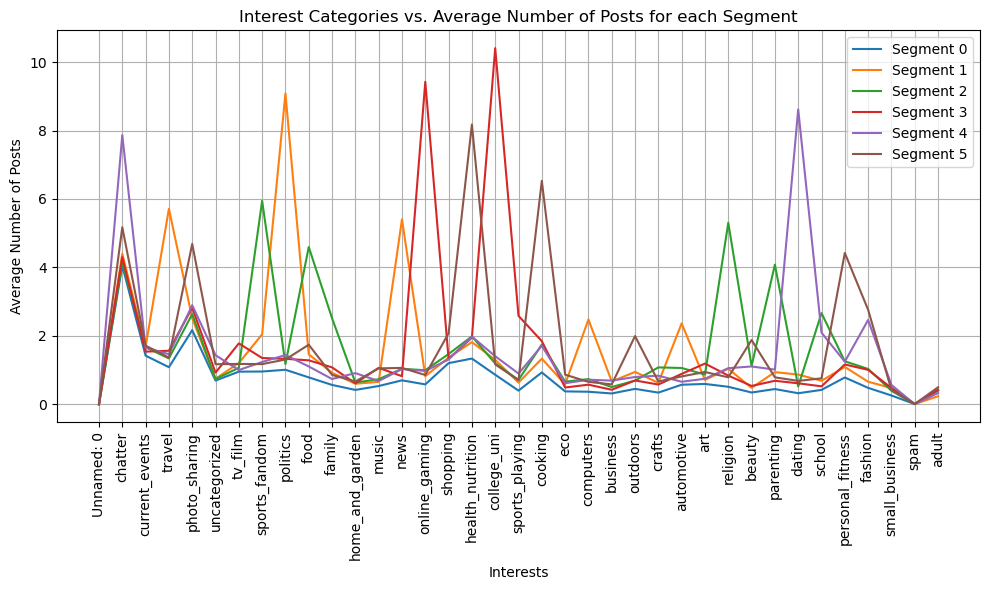

In [79]:
# Visualizing the results
plt.figure(figsize=(10, 6))
for segment in range(num_clusters):
    plt.plot(segments_data.index, segments_data[segment], label=f"Segment {segment}")
plt.xlabel('Interests')
plt.ylabel('Average Number of Posts')
plt.title('Interest Categories vs. Average Number of Posts for each Segment')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let's examine the characteristics of each market segment based on the provided data and draw insights from their average posting behavior across various interest categories.

## Segment 0 - Consistent Generalists:
+ Profile: Broad interest, no focus.


+ Interests: Moderate engagement in “chatter,” “current_events,” “photo_sharing.”

+ Insight: Likely generalists, interested in diverse, everyday topics.

## Segment 1 - Social & Event Enthusiasts:
+ Profile: High engagement in social content.
  
+ Interests: Peaks in “chatter,” “current_events,” “travel,” “music.”
  
+ Insight: Driven by FOMO, active in social and cultural events.

## Segment 2 - Fitness & Family-Oriented Individuals:
+ Profile: Balances family life and fitness.

+ Interests: “sports_fandom,” “family,” “home_and_garden,” “sports_playing.”

+ Insight: Health-conscious, engaged in family and home activities.

## Segment 3 - Online Gamers & Trend Followers:
+ Profile: Tech-savvy, online-focused.

+ Interests: “online_gaming,” “shopping,” “tech.”
  
+ Insight:  Young, tech-driven, active in gaming and online shopping.

## Segment 4 - Beauty & Parenting Focused:
+ Profile: Beauty and family-centric.


+ Interests:“beauty,” “parenting,” “dating.”.

+ Insight:Balances family duties with personal care and relationships..

## Segment 5 - Outdoors & DIY Enthusiasts:
+  Profile: Adventurous, hands-on."

+ Interests: “outdoors,” “automotive,” “crafts,” “personal_fitness.”
  

+ Insight:Enjoys outdoor activities, DIY projects, and vehicles..
 

## Key Takeaways and Recommendations:

	•	Targeted Content: Tailor content to segment interests (e.g., outdoor content for Segment 5, beauty tips for Segment 4).
	•	Personalized Marketing: Match messaging to preferences (e.g., family focus for Segment 2, gaming for Segment 3).
	•	Engage Audiences: Interact on relevant topics (e.g., fitness in Segment 0, current events in Segment 1).
	•	Custom Campaigns: Use insights to refine marketing strategies for better relevance and engagement.
	•	Test & Optimize: A/B test content across segments to find what resonabestst.
est.

## Key Takeaways and Recommendations:

+  Targeted Content: Tailor content to segment interests (e.g., outdoor content for Segment 5, beauty tips for Segment 4).
+  Personalized Marketing: Match messaging to preferences (e.g., family focus for Segment 2, gaming for Segment 3).
+  Engage Audiences: Interact on relevant topics (e.g., fitness in Segment 0, current events in Segment 1).
+  Custom Campaigns: Use insights to refine marketing strategies for better relevance and engagement.
+  Test & Optimize: A/B test content across segments to find what resonates best

 These insights give NutrientH20 a solid foundation to customize its messaging for different audience segments and enhance its social media strategy for more effective audience connection. By comprehending the varied interests of their followers, NutrientH20 can drive meaningful engagement and strengthen relationships with its customers.